In [1]:
from langid_crf import *
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from helper.dataset_reader import read_tsv
from helper.features import *
from helper.data_transformer import *

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

In [3]:
raw_data = read_tsv('../dataset/comlid-data-140422-v1.tsv')
data = to_token_tag_list(raw_data)
X = [langid.sent2features(s) for s in data]
y = [langid.sent2tags(s) for s in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [4]:
print("Training data: ", len(X_train))
print("Test data: ",len(X_test))

Training data:  3613
Test data:  1781


In [5]:
crf_model, y_pred_train, y_pred_test = langid.train_test_crf(X_train, y_train, X_test)


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.95      0.98      0.96     22310
          JV       0.91      0.91      0.91      4921
          EN       0.93      0.93      0.93      5018
   MIX-ID-EN       0.97      0.91      0.94       973
   MIX-ID-JV       0.96      0.88      0.92       278
   MIX-JV-EN       0.95      0.86      0.90       276
           O       0.97      0.92      0.94     10161

    accuracy                           0.95     43937
   macro avg       0.95      0.91      0.93     43937
weighted avg       0.95      0.95      0.95     43937



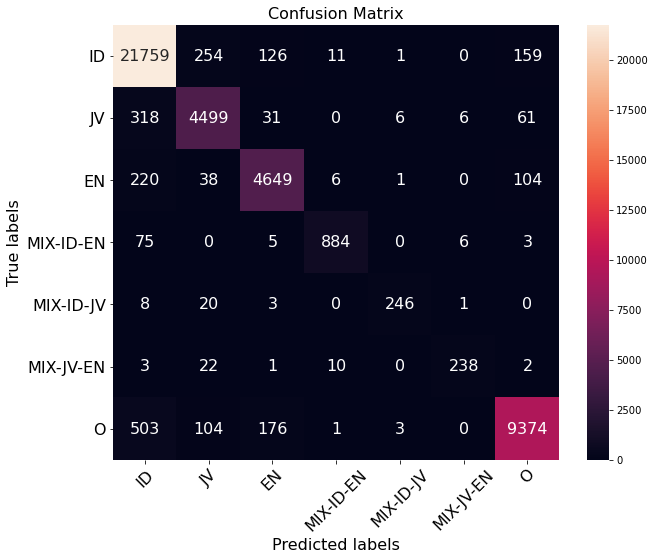


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.99      0.99      0.99     45357
          JV       0.98      0.97      0.98      9730
          EN       0.99      0.99      0.99     11086
   MIX-ID-EN       1.00      0.99      0.99      2000
   MIX-ID-JV       1.00      0.99      0.99       598
   MIX-JV-EN       0.97      0.99      0.98       516
           O       1.00      0.99      0.99     20566

    accuracy                           0.99     89853
   macro avg       0.99      0.99      0.99     89853
weighted avg       0.99      0.99      0.99     89853



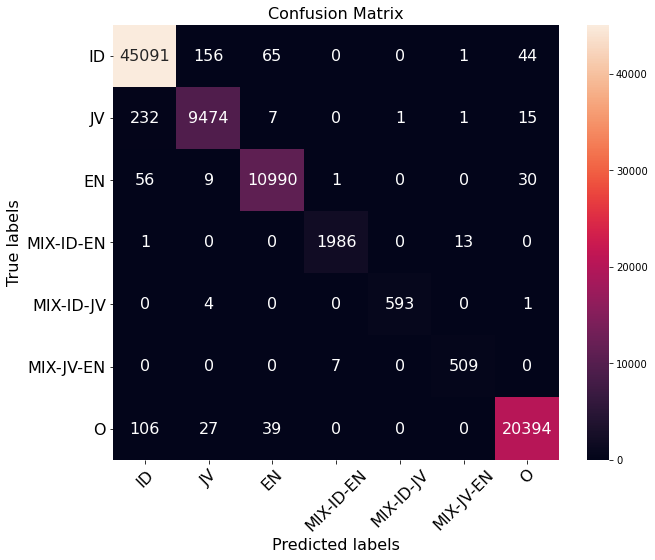


Top likely transitions:
O          -> O          0.91546
JV         -> O          0.87557
O          -> JV         0.84741
JV         -> JV         0.80578
ID         -> O          0.78310
O          -> ID         0.71654
EN         -> O          0.65300
O          -> EN         0.50953
EN         -> EN         0.44758
ID         -> ID         0.21584
O          -> MIX-ID-EN  0.07240
JV         -> MIX-JV-EN  0.01881
JV         -> MIX-ID-JV  0.00680
MIX-JV-EN  -> O          -0.00687
MIX-ID-JV  -> JV         -0.09739
ID         -> EN         -0.12518
MIX-ID-EN  -> O          -0.13057
JV         -> ID         -0.13288
JV         -> EN         -0.14479
ID         -> JV         -0.16476

Top unlikely transitions:
MIX-ID-EN  -> ID         -0.55776
ID         -> MIX-ID-JV  -0.56488
MIX-ID-EN  -> MIX-ID-EN  -0.57815
EN         -> MIX-JV-EN  -0.61969
MIX-ID-JV  -> EN         -0.62832
MIX-ID-JV  -> MIX-JV-EN  -0.65307
O          -> MIX-JV-EN  -0.67524
MIX-JV-EN  -> EN         -0.69566
MIX-JV-EN

In [6]:
model_name = 'crf_model_.pkl'
langid.result_performance(y_train, y_test, y_pred_train, y_pred_test, model_name)

In [7]:
eli5.show_weights(crf_model, horizontal_layout=False, show=['transition_features'])

From \ To,EN,ID,JV,MIX-ID-EN,MIX-ID-JV,MIX-JV-EN,O
EN,0.448,-0.205,-0.29,-0.484,-1.108,-0.62,0.653
ID,-0.125,0.216,-0.165,-0.343,-0.565,-1.248,0.783
JV,-0.145,-0.133,0.806,-1.364,0.007,0.019,0.876
MIX-ID-EN,-0.488,-0.558,-1.059,-0.578,-1.112,-2.003,-0.131
MIX-ID-JV,-0.628,-0.55,-0.097,-3.198,-1.37,-0.653,-0.197
MIX-JV-EN,-0.696,-1.384,-0.298,-1.103,-1.222,-0.873,-0.007
O,0.51,0.717,0.847,0.072,-0.387,-0.675,0.915


In [8]:
eli5.show_weights(crf_model, targets=['ID', 'EN', 'JV'])

In [9]:
eli5.show_weights(crf_model, targets=['MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN', 'O'])

In [10]:
y_pred_test

[['ID',
  'ID',
  'EN',
  'ID',
  'O',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'EN',
  'EN',
  'O'],
 ['O',
  'O',
  'EN',
  'EN',
  'EN',
  'O',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'EN',
  'O',
  'EN',
  'EN',
  'EN',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'ID',
  'ID',
  'ID',
  'O',
  'O',
  'EN',
  'EN',
  'EN',
  'O',
  'EN',
  'EN',
  'EN',
  'O',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'EN'],
 ['ID',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'O',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'ID',
  'EN',
  'ID',
  'MIX-ID-EN',
  'ID',
  'ID',
  'O'],
 ['O',
  'O',
  'EN',
  'EN',
  'EN',
  'O',
  'JV',
  'JV',
  'ID',
  'O',
  'O',
  'O',
  'JV',
  'JV',
  'ID',
  'ID',
  'ID',
  'O',
  'ID',
  'JV',
  'JV',
  'JV',
  'JV',
  'JV',
  'O',
  'JV',
  'JV',
  'JV',
  'JV',
  'JV',
  'JV',
  'JV',
  'O',
 

In [11]:
token_list = []
n = 0

for items in range(len(X_test)):
    sent_token_list = []
    for item in X_test[n]:
        sent_token_list.append(item['token.lower'])
    n += 1
    token_list.append(sent_token_list)

In [12]:
print(token_list)
print(y_pred_test)

[['cara', 'menghilangkan', 'ovt', 'gimana', ':d', ',', 'walau', 'udh', 'mule', 'teneg', 'tapi', 'ga', 'teneg', 'lagi', 'jadinya', '(', 'harusnya', 'ke', 'priv', 'tapi', 'males', 'switch', 'acc', ')'], ['eng', '!', 'last', 'night', 'i', '...', 'dinner', 'with', 'my', 'friend', 'when', 'it', 'rainded', 'heavily', 'so', ',', 'i', 'cancelled', 'it', 'kalau', 'kayaa', 'gitu', 'jawabnya', 'pake', 'verb', '2', 'boleh', 'nggak', 'yaa', '?', '(', 'wanted', 'to', 'had', '/', 'want', 'to', 'have', ')', '??', 'kira', 'kira', 'yang', 'bener', 'yang', 'mana', 'yaa', ',', 'thankyou'], ['kok', 'twt', 'aku', 'skrng', 'jd', 'lemot', 'ya', '..', 'buka', 'gambar', 'lama', 'bngt', 'trs', 'pengen', 'buka', 'dm', 'juga', 'loadingnya', 'lama', 'bngt', '😪'], ['@leadersheepy', '@tokopedia', 'gilssss', 'collab', 'maneh', ',', 'duite', 'akeh', 'sekali', '🤤', '🤤', '🤔', 'yahhh', 'sangane', 'serum', 'lebih', 'penting', ',', 'dan', 'ng', 'toko', 'iki', 'gak', 'diskon', 'wkwkkw', 'kowe', 'wes', 'entuk', 'pc', 'ne', 's

In [13]:
df1 = pd.DataFrame({'Tokens': token_list})
df2 = pd.DataFrame({'Tags_true': y_test})
df3 = pd.DataFrame({'Tags_pred': y_pred_test})
df_join = pd.concat([df1, df2, df3], axis=1, join='inner')

In [14]:
df_join

,Tokens,Tags_true,Tags_pred
0,"[cara, menghilangkan, ovt, gimana, :d, ,, wala...","[ID, ID, EN, ID, O, O, ID, ID, ID, ID, ID, ID,...","[ID, ID, EN, ID, O, O, ID, ID, ID, ID, ID, ID,..."
1,"[eng, !, last, night, i, ..., dinner, with, my...","[O, O, EN, EN, EN, O, EN, EN, EN, EN, EN, EN, ...","[O, O, EN, EN, EN, O, EN, EN, EN, EN, EN, EN, ..."
2,"[kok, twt, aku, skrng, jd, lemot, ya, .., buka...","[ID, O, ID, ID, ID, ID, ID, O, ID, ID, ID, ID,...","[ID, O, ID, ID, ID, ID, ID, O, ID, ID, ID, ID,..."
3,"[@leadersheepy, @tokopedia, gilssss, collab, m...","[O, O, EN, EN, JV, O, JV, JV, ID, O, O, O, ID,...","[O, O, EN, EN, EN, O, JV, JV, ID, O, O, O, JV,..."
4,"[lagi, nyetel, be, together, trus, iseng, cek,...","[ID, ID, EN, EN, ID, ID, ID, EN, ID, O, EN, EN...","[ID, ID, EN, EN, ID, ID, ID, EN, ID, ID, EN, E..."
...,...,...,...
1776,"[@northerncsl, model2, ngene, kalah, ngolek, s...","[O, JV, JV, JV, JV, JV, JV, JV, JV, JV, O, JV,...","[O, JV, JV, JV, JV, JV, JV, JV, JV, JV, O, ID,..."
1777,"[ket, mau, moco, storyne, wong², bab, iki, kok...","[JV, JV, JV, MIX-JV-EN, O, JV, JV, JV, JV, JV,...","[JV, JV, JV, MIX-JV-EN, JV, JV, JV, JV, JV, JV..."
1778,"[beli, tulang, sumsum, via, tokped, ., ga, mah...","[ID, ID, ID, ID, O, O, ID, ID, ID, O, ID, ID, ...","[ID, ID, ID, ID, O, O, ID, ID, ID, O, ID, JV, ..."
1779,"[@diajengemy_, @satriaxbrandal, @agama_nusanta...","[O, O, O, O, O, JV, O, JV, JV, JV, O, JV, JV, ...","[O, O, O, O, O, ID, O, JV, JV, JV, O, JV, JV, ..."


In [15]:
token_true_pred = []
for index, row in df_join.iterrows():
    pair = list(zip(row['Tokens'], row['Tags_true'], row['Tags_pred']))
    token_true_pred.append(pair)

In [16]:
token_true_pred

[[('cara', 'ID', 'ID'),
  ('menghilangkan', 'ID', 'ID'),
  ('ovt', 'EN', 'EN'),
  ('gimana', 'ID', 'ID'),
  (':d', 'O', 'O'),
  (',', 'O', 'O'),
  ('walau', 'ID', 'ID'),
  ('udh', 'ID', 'ID'),
  ('mule', 'ID', 'ID'),
  ('teneg', 'ID', 'ID'),
  ('tapi', 'ID', 'ID'),
  ('ga', 'ID', 'ID'),
  ('teneg', 'ID', 'ID'),
  ('lagi', 'ID', 'ID'),
  ('jadinya', 'ID', 'ID'),
  ('(', 'O', 'O'),
  ('harusnya', 'ID', 'ID'),
  ('ke', 'ID', 'ID'),
  ('priv', 'EN', 'ID'),
  ('tapi', 'ID', 'ID'),
  ('males', 'ID', 'ID'),
  ('switch', 'EN', 'EN'),
  ('acc', 'EN', 'EN'),
  (')', 'O', 'O')],
 [('eng', 'O', 'O'),
  ('!', 'O', 'O'),
  ('last', 'EN', 'EN'),
  ('night', 'EN', 'EN'),
  ('i', 'EN', 'EN'),
  ('...', 'O', 'O'),
  ('dinner', 'EN', 'EN'),
  ('with', 'EN', 'EN'),
  ('my', 'EN', 'EN'),
  ('friend', 'EN', 'EN'),
  ('when', 'EN', 'EN'),
  ('it', 'EN', 'EN'),
  ('rainded', 'EN', 'EN'),
  ('heavily', 'EN', 'EN'),
  ('so', 'EN', 'EN'),
  (',', 'O', 'O'),
  ('i', 'EN', 'EN'),
  ('cancelled', 'EN', 'EN'),
  ('i

In [17]:
true_pred_file = 'results.tsv'
with open(true_pred_file, "a") as f:
    f.write("Word" + "\t" + "True" + "\t" + "Predict" + "\n")
    for index, row in df_join.iterrows():
        for tkn, t_true, t_pred in (zip(row['Tokens'], row['Tags_true'], row['Tags_pred'])):
            f.write(tkn + '\t' + t_true + '\t' + t_pred + '\n')
        f.write('\n')